In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
mnist_train = pd.read_csv("mnist_train.csv", header=None)
mnist_test = pd.read_csv("mnist_test.csv", header=None)

In [3]:
mnist_train.shape

(60000, 785)

In [4]:
mnist_train

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [89]:
cols = ["label"]

# делаем массив вида ["label", "px_0", "px_1", ..., "px_784"]

for i in range(784):
    cols.append("px_{}".format(i + 1))

In [6]:
mnist_train.columns = cols
mnist_test.columns = cols

In [7]:
mnist_test.head(5)

,label,px_1,px_2,px_3,px_4,px_5,px_6,px_7,px_8,px_9,...,px_775,px_776,px_777,px_778,px_779,px_780,px_781,px_782,px_783,px_784
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
image_size = 28

In [9]:
train_label = mnist_train["label"].values

In [10]:
type(train_label)

numpy.ndarray

In [11]:
train_label.shape


(60000,)

In [12]:
test_label = mnist_test["label"].values

In [13]:
test_label.shape

(10000,)

In [14]:
matrix = np.array([
    [1, 2, 3],
    [4, 5, 6]
])

In [15]:
matrix

array([[1, 2, 3],
       [4, 5, 6]])

In [17]:
matrix[:, 1]

array([2, 5])

In [18]:
matrix[:, 1:]

array([[2, 3],
       [5, 6]])

In [19]:
train_images = mnist_train.values[:, 1:]

In [20]:
train_images.shape

(60000, 784)

In [21]:
test_images = mnist_test.values[:, 1:]
test_images.shape

(10000, 784)

In [22]:
train_images = train_images.reshape(60000, 28, 28)

In [23]:
test_images = test_images.reshape(10000, 28, 28)

In [24]:
train_images

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [25]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

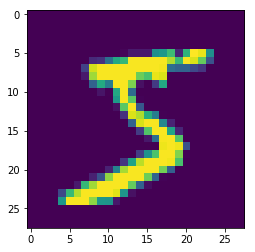

In [26]:
plt.imshow(train_images[0])

In [29]:
from sklearn.neighbors import KNeighborsClassifier

In [32]:
knn_classifier = KNeighborsClassifier(n_jobs=-1)

In [33]:
# fit/predict - fit(тренировка), predict(предсказание)

In [34]:
train_images.shape

(60000, 28, 28)

In [31]:
knn_classifier = knn_classifier.fit(train_images, train_label)

ValueError: Found array with dim 3. Estimator expected <= 2.

In [35]:
knn_classifier = knn_classifier.fit(train_images.reshape(60000, 784), train_label)

In [52]:
image_id = 947

In [53]:
prediction = knn_classifier.predict(test_images[image_id].reshape(1, 784))

In [54]:
prediction

array([9])

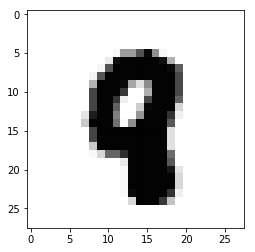

In [55]:
plt.imshow(test_images[image_id], cmap="Greys")

In [56]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [57]:
accuracy_score?

Signature: accuracy_score(y_true, y_pred, normalize=True, sample_weight=None)
Docstring:
Accuracy classification score.

In multilabel classification, this function computes subset accuracy:
the set of labels predicted for a sample must *exactly* match the
corresponding set of labels in y_true.

Read more in the :ref:`User Guide <accuracy_score>`.

Parameters
----------
y_true : 1d array-like, or label indicator array / sparse matrix
    Ground truth (correct) labels.

y_pred : 1d array-like, or label indicator array / sparse matrix
    Predicted labels, as returned by a classifier.

normalize : bool, optional (default=True)
    If ``False``, return the number of correctly classified samples.
    Otherwise, return the fraction of correctly classified samples.

sample_weight : array-like of shape = [n_samples], optional
    Sample weights.

Returns
-------
score : float
    If ``normalize == True``, return the fraction of correctly
    classified samples (float), else returns the number

In [58]:
all_predictions = knn_classifier.predict(test_images.reshape(10000, 784))

In [59]:
accuracy_score(test_label, all_predictions) * 100

96.88

In [60]:
cm = confusion_matrix(test_label, all_predictions)

In [61]:
cm

array([[ 974,    1,    1,    0,    0,    1,    2,    1,    0,    0],
       [   0, 1133,    2,    0,    0,    0,    0,    0,    0,    0],
       [  11,    8,  991,    2,    1,    0,    1,   15,    3,    0],
       [   0,    3,    3,  976,    1,   13,    1,    6,    3,    4],
       [   3,    7,    0,    0,  944,    0,    4,    2,    1,   21],
       [   5,    0,    0,   12,    2,  862,    4,    1,    2,    4],
       [   5,    3,    0,    0,    3,    2,  945,    0,    0,    0],
       [   0,   22,    4,    0,    3,    0,    0,  988,    0,   11],
       [   8,    3,    5,   13,    6,   12,    5,    5,  913,    4],
       [   5,    7,    3,    9,    7,    3,    1,   10,    2,  962]])

In [62]:
list(zip([1,2,3], ["I", "II", "III"]))

[(1, 'I'), (2, 'II'), (3, 'III')]

In [63]:
list(enumerate(["a", "b", "c", "d"]))

[(0, 'a'), (1, 'b'), (2, 'c'), (3, 'd')]

In [64]:
from sklearn.neural_network import MLPClassifier

In [101]:
nn_classifier = MLPClassifier(hidden_layer_sizes=(784, 800), verbose=True)

In [102]:
nn_classifier = nn_classifier.fit(train_images.reshape(60000, 784), train_label)

Iteration 1, loss = 1.12153111
Iteration 2, loss = 0.20550539
Iteration 3, loss = 0.13939735
Iteration 4, loss = 0.10290416
Iteration 5, loss = 0.09823219
Iteration 6, loss = 0.11321291
Iteration 7, loss = 0.11318667
Iteration 8, loss = 0.09371219
Iteration 9, loss = 0.07633202
Iteration 10, loss = 0.05976429
Iteration 11, loss = 0.07659531
Iteration 12, loss = 0.06932331
Iteration 13, loss = 0.08259906
Iteration 14, loss = 0.06077765
Iteration 15, loss = 0.09672590
Iteration 16, loss = 0.06811471
Iteration 17, loss = 0.05229539
Iteration 18, loss = 0.04639333
Iteration 19, loss = 0.08126585
Iteration 20, loss = 0.07071799
Iteration 21, loss = 0.06027162
Iteration 22, loss = 0.06500549
Iteration 23, loss = 0.06253183
Iteration 24, loss = 0.05383567
Iteration 25, loss = 0.05542787
Iteration 26, loss = 0.06533567
Iteration 27, loss = 0.05490149
Iteration 28, loss = 0.06602926
Iteration 29, loss = 0.06722128
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. S

In [103]:
image_id = 123

In [104]:
prediciton = nn_classifier.predict(test_images[image_id].reshape(1, 784))

In [105]:
prediction

array([9])

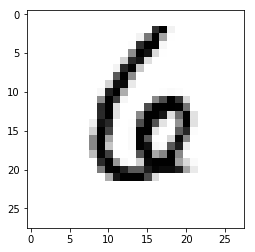

In [106]:
plt.imshow(test_images[image_id], cmap="Greys")

In [107]:
all_predictions = nn_classifier.predict(test_images.reshape(10000, 784))

In [108]:
accuracy_score(test_label, all_predictions) * 100

96.94

In [99]:
cm = confusion_matrix(test_label, all_predictions)

In [100]:
cm

array([[   0,  980,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0, 1135,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0, 1032,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0, 1010,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,  982,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,  892,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,  958,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0, 1028,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,  974,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0, 1009,    0,    0,    0,    0,    0,    0,    0,    0]])

Prediction: 2


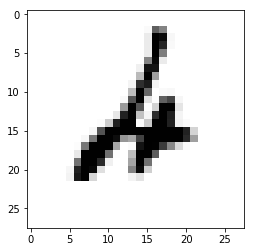

Prediction: 9


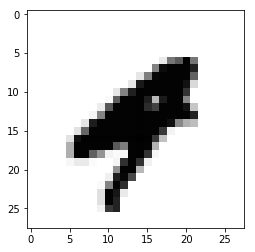

Prediction: 8


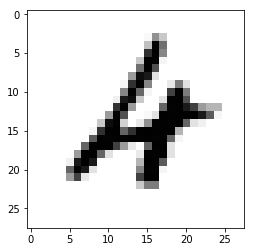

Prediction: 9


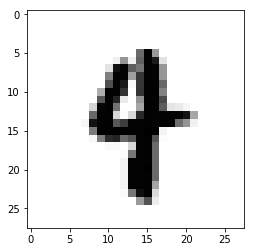

Prediction: 9


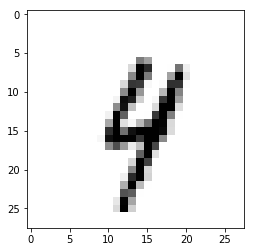

Prediction: 6


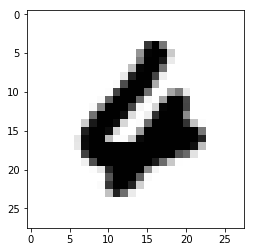

Prediction: 9


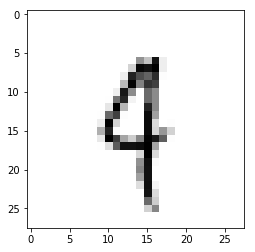

Prediction: 2


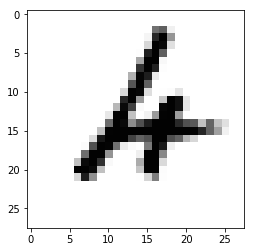

Prediction: 9


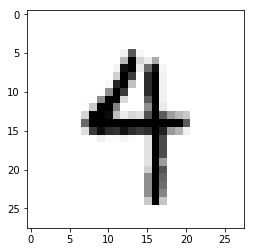

Prediction: 8


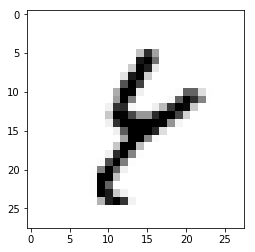

Prediction: 9


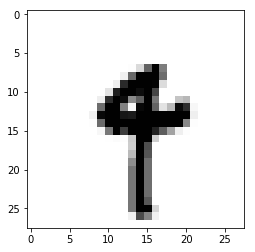

Prediction: 1


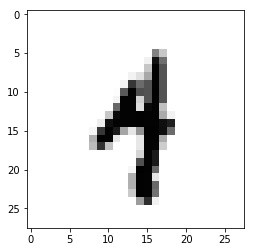

Prediction: 9


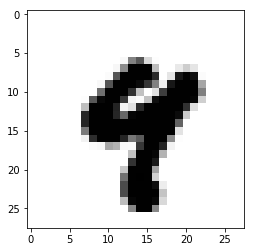

Prediction: 0


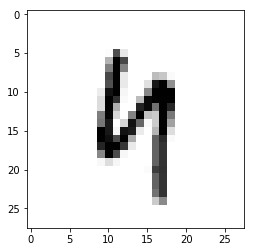

Prediction: 2


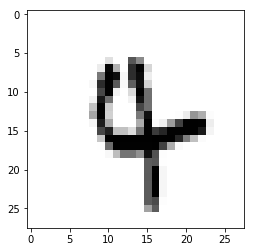

Prediction: 9


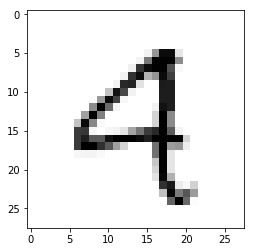

Prediction: 8


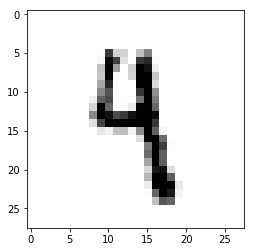

Prediction: 6


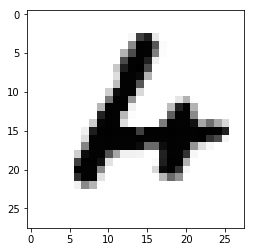

Prediction: 2


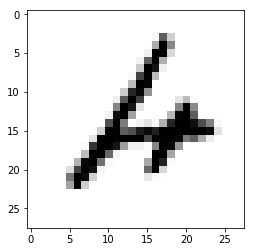

Prediction: 9


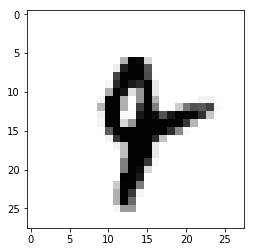

Prediction: 2


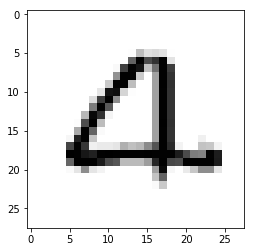

Prediction: 6


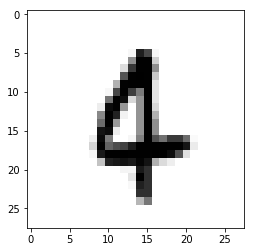

Prediction: 2


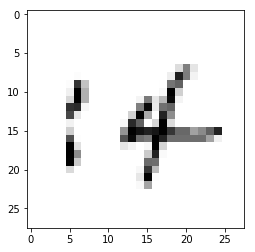

Prediction: 2


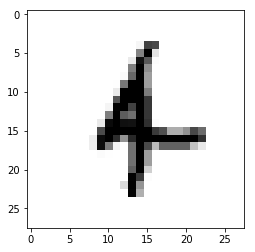

Prediction: 0


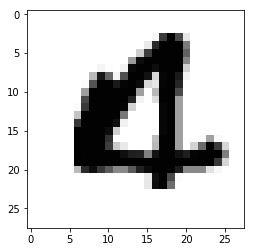

Prediction: 9


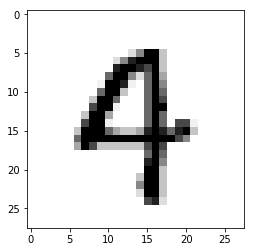

Prediction: 2


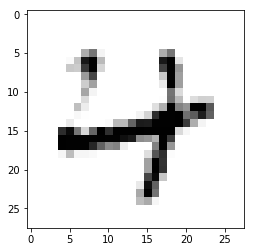

Prediction: 6


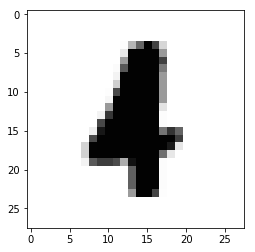

Prediction: 0


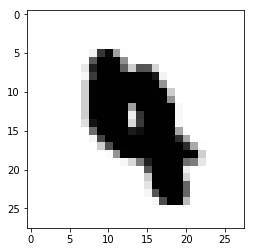

Prediction: 7


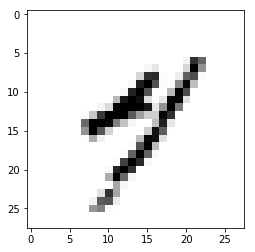

Prediction: 2


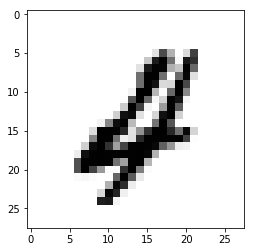

Prediction: 2


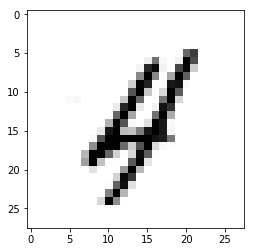

Prediction: 2


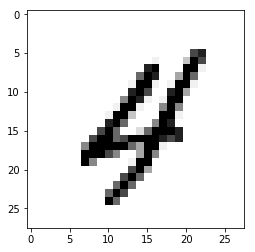

Prediction: 1


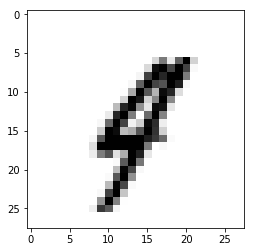

In [88]:
for i, (real, pred) in enumerate(zip(test_label, all_predictions)):
    if real == 4 and real != pred:
        print("Prediction: " + str(pred))
        plt.imshow(test_images[i], cmap="Greys")
        plt.show()